Воловичева Алиса, ИДБ-19-09, Лабораторная работа №2

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
housing = pd.read_csv('housing.csv')

In [3]:
#Проведите преобразование категориального признака ocean_proximity через OneHot или Dummy-кодировку
housing = pd.get_dummies(housing, columns = ['ocean_proximity'])

In [4]:
#Замените признаки total_rooms и total_bedrooms на average_rooms и average_bedrooms (поделив на households).
housing['average_rooms'] = housing['total_rooms']/housing['households']
housing = housing.drop('total_rooms', axis=1)
housing['average_bedrooms'] = housing['total_bedrooms']/housing['households']
housing = housing.drop('total_bedrooms', axis=1)
housing

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,average_rooms,average_bedrooms
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,6.281853,1.081081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0,5.045455,1.133333
20636,-121.21,39.49,18.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0,6.114035,1.315789
20637,-121.22,39.43,17.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0,5.205543,1.120092
20638,-121.32,39.43,18.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0,5.329513,1.171920


In [5]:
# В признаке average_bedrooms (total_bedrooms) есть отсутствующие значения. 
# Определите число экземпляров данных, для которых этот признак отсутствует. 
housing.loc[housing['average_bedrooms'].isnull()]
# Снизу таблицы подписано - 207

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,average_rooms,average_bedrooms
290,-122.16,37.77,47.0,570.0,218.0,4.3750,161900.0,0,0,0,1,0,5.761468,NaN
341,-122.17,37.75,38.0,732.0,259.0,1.6196,85100.0,0,0,0,1,0,3.830116,NaN
538,-122.28,37.78,29.0,3741.0,1273.0,2.5762,173400.0,0,0,0,1,0,4.048704,NaN
563,-122.24,37.75,45.0,384.0,146.0,4.9489,247100.0,0,0,0,1,0,6.102740,NaN
696,-122.10,37.69,41.0,387.0,161.0,3.9063,178400.0,0,0,0,1,0,4.633540,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3171.0,779.0,3.3409,220500.0,0,0,0,0,1,4.646983,NaN
20268,-119.18,34.19,19.0,1938.0,762.0,1.6953,167400.0,0,0,0,0,1,3.140420,NaN
20372,-118.88,34.17,15.0,1701.0,669.0,5.1033,410700.0,1,0,0,0,0,6.367713,NaN
20460,-118.75,34.29,17.0,2734.0,814.0,6.6073,258100.0,1,0,0,0,0,6.771499,NaN


In [6]:
#Разбейте датасет на тренировочную, валидационную и тестовую выборку
housing_train_val, housing_test =  train_test_split( housing, test_size =0.1)
housing_train, housing_val =  train_test_split( housing_train_val, test_size =0.1)

In [44]:
#Придумайте и обоснуйте стратегию заполнения пропусков в этой задаче. Заполните пропуски.
train_mean = np.mean(housing_train['average_bedrooms'])
train_mean

1.0976144801652028

In [8]:
housing_null = housing['average_bedrooms'].isnull()
housing_train.loc[housing_null, 'average_bedrooms'] = train_mean
housing_test.loc[housing_null, 'average_bedrooms'] = train_mean
housing_val.loc[housing_null, 'average_bedrooms'] = train_mean

In [9]:
housing_test.loc[housing['average_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,average_rooms,average_bedrooms
5723,-118.23,34.18,45.0,943.0,339.0,8.1132,446600.0,1,0,0,0,0,6.879056,1.097614
16330,-121.33,38.02,31.0,608.0,254.0,3.1827,162100.0,0,1,0,0,0,5.771654,1.097614
7191,-118.18,34.04,42.0,1997.0,452.0,2.7880,150500.0,1,0,0,0,0,3.694690,1.097614
7763,-118.10,33.91,36.0,490.0,130.0,3.6389,167600.0,1,0,0,0,0,5.584615,1.097614
20046,-119.01,36.06,25.0,1392.0,359.0,1.6812,47700.0,0,1,0,0,0,4.192201,1.097614
9845,-121.90,36.58,31.0,704.0,393.0,3.1977,289300.0,0,0,0,0,1,3.641221,1.097614
2351,-119.68,36.79,16.0,1010.0,292.0,3.5417,71300.0,0,1,0,0,0,5.311644,1.097614
15118,-116.95,32.84,31.0,752.0,231.0,3.4286,129400.0,1,0,0,0,0,5.658009,1.097614
19833,-119.38,36.53,38.0,1423.0,293.0,1.9602,51400.0,0,1,0,0,0,4.372014,1.097614
6590,-118.18,34.19,48.0,528.0,155.0,15.0001,500001.0,1,0,0,0,0,8.845161,1.097614


In [11]:
# Нормализуйте признаки longitude и latitude 
# (сделайте так, чтобы каждый признак имел среднее значение 0 и дисперсию 1 внутри обучающей выборки)

def normalize(train, other, columns):
    for column in columns:
        scaler = preprocessing.StandardScaler().fit(train[[column]])
        train[column] = scaler.transform(train[[column]]).reshape(-1)
        for arr in other:
            arr[column] = scaler.transform(arr[[column]]).reshape(-1)
        print (train[column].mean())
        print (train[column].std())
        print (other[0][column].mean())
        print (other[0][column].std())

In [12]:
normalize( housing_train, [housing_test, housing_val], ['longitude','latitude'])

3.899102199942074e-15
1.0000299092255072
-0.048244937756780806
0.9919578904372467
1.159339004348375e-15
1.0000299092255072
0.05645410190264134
0.9922126388472519


In [13]:
#2.1
davis = pd.read_csv('Davis.csv')
davis

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0
...,...,...,...,...,...,...
195,196,M,74,175,71.0,175.0
196,197,M,83,180,80.0,180.0
197,198,M,81,175,NaN,NaN
198,199,M,90,181,91.0,178.0


In [14]:
# Удалите некорректные данные

davis = davis.loc[davis['weight'] > davis['weight'].quantile(q=0.05)]
davis = davis.loc[davis['weight'] < davis['weight'].quantile(q=0.99)]
davis = davis.loc[davis['height'] > davis['height'].quantile(q=0.001)]
davis['sex'] = davis['sex'].apply(lambda sex: 1 if sex == "F" else 0)
davis = davis.drop('Unnamed: 0', axis=1)

davis

,sex,weight,height,repwt,repht
0,0,77,182,77.0,180.0
1,1,58,161,51.0,159.0
2,1,53,161,54.0,158.0
3,0,68,177,70.0,175.0
4,1,59,157,59.0,155.0
...,...,...,...,...,...
195,0,74,175,71.0,175.0
196,0,83,180,80.0,180.0
197,0,81,175,NaN,NaN
198,0,90,181,91.0,178.0


In [15]:
# Выделите тестовую выборку из 50 экземпляров
davis_train, davis_test = train_test_split(davis, test_size = 50)

<AxesSubplot:xlabel='weight', ylabel='Count'>

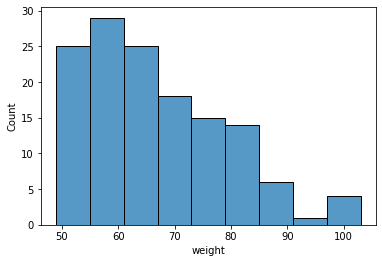

In [16]:
# На тренировочных данных постройте:
#    Гистограмму height
#    Гистограмму weight
#    Эти же гистограммы для разных полов

import seaborn as sns
sns.histplot(davis_train['weight'])

<AxesSubplot:xlabel='height', ylabel='Count'>

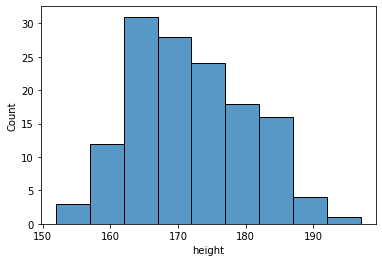

In [17]:
sns.histplot(davis_train['height'])

Эти же гистограммы для разных полов

<AxesSubplot:xlabel='weight', ylabel='Count'>

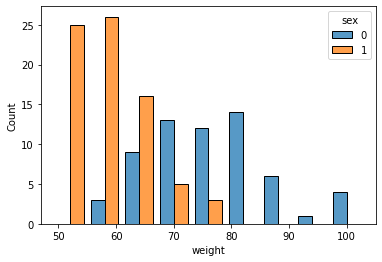

In [18]:
sns.histplot(data = davis_train, x = davis_train["weight"], hue= davis_train['sex'], multiple="dodge", shrink=.8)


<AxesSubplot:xlabel='height', ylabel='Count'>

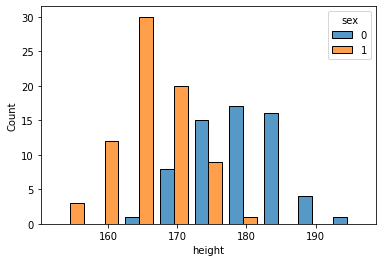

In [19]:
sns.histplot(data = davis_train, x = davis_train['height'], hue= davis_train['sex'], multiple="dodge", shrink=.8)

In [20]:
# На тренировочных данных обучите классификатор пола (sex),
# используя только признаки height и weight. 
# Замерьте производительность на тренировочной и тестовой выборке (через Accuracy).
# Модель: quadratic discriminant analysis.
x_train, y_train = davis_train[['height','weight']], davis_train['sex']
x_test, y_test = davis_test[['height','weight']], davis_test['sex']

In [21]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [22]:
accuracy_score(log_reg.predict(x_train), y_train)

0.9051094890510949

In [23]:
accuracy_score(log_reg.predict(x_test), y_test)

0.92

In [24]:
# Отобразите точки из обучающей выборки на плоскости (height-weight).
# Покрасьте их цветами в зависимости от пола.
# Раскрасьте области в зависимости от пола, предсказанного обученным в п.4. классификатором.
# Сделайте аналогичный график на тестовой выборке

x1_min, x1_max = x_train['weight'].min()-1, x_train['weight'].max()+1
x2_min, x2_max = x_train['height'].min()-1, x_train['height'].max()+1

In [25]:
xx1,xx2 = np.mgrid[x1_min:x1_max:50j, x2_min:x2_max:50j]

In [26]:
X_pred = np.column_stack([xx2.reshape(-1),xx1.reshape(-1) ])

In [27]:
y_pred = log_reg.predict(X_pred)

C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


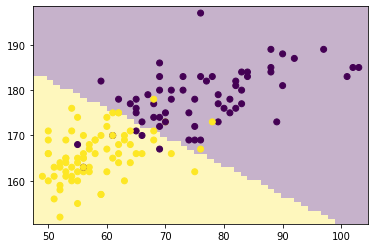

In [28]:
plt.pcolormesh(xx1,xx2, y_pred.reshape(xx1.shape), alpha=0.3, shading='auto')
plt.scatter(x_train['weight'], x_train['height'], c = y_train)
plt.show()


Сделайте аналогичный график на тестовой выборке

In [29]:
x1_min, x1_max = x_test['weight'].min()-1, x_test['weight'].max()+1
x2_min, x2_max = x_test['height'].min()-1, x_test['height'].max()+1
xx1,xx2 = np.mgrid[x1_min:x1_max:50j, x2_min:x2_max:50j]
X_pred = np.column_stack([xx2.reshape(-1),xx1.reshape(-1) ])
y_pred = log_reg.predict(X_pred)

C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


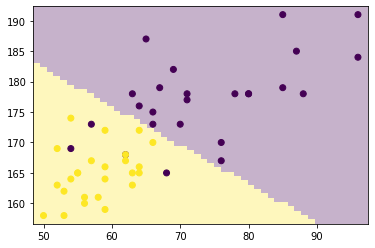

In [30]:
plt.pcolormesh(xx1,xx2, y_pred.reshape(xx1.shape), alpha=0.3, shading='auto')
plt.scatter(x_test['weight'], x_test['height'], c = y_test)
plt.show()

In [32]:
#2.2
ccpp = pd.read_excel('CCPP.xlsx')

In [33]:
ccpp

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [45]:
# Возьмите данные с листа 1 и выделите валидационную и тестовую выборку.
ccpp_train_val, ccpp_test = train_test_split(ccpp, test_size=0.1)
ccpp_train, ccpp_val = train_test_split(ccpp_train_val, test_size=0.1)

In [38]:
# Постройте регрессионную модель. 
# Замерьте коэффициент  и среднюю ошибку предсказания на валидационной выборке.

reg = LinearRegression()

In [39]:
X_train = ccpp_train.drop("PE",axis=1)
y_train = ccpp_train['PE']

In [40]:
reg.fit(X_train, y_train)

LinearRegression()

In [41]:
r2_score(ccpp_val['PE'], reg.predict(ccpp_val.drop("PE",axis=1)))

0.9324220878112494

In [42]:
mean_absolute_error(ccpp_val['PE'], reg.predict(ccpp_val.drop("PE",axis=1)))

3.628336991620588

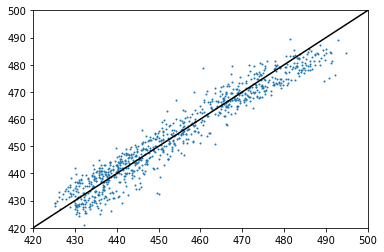

In [43]:
# Постройте точки из валидационной выборки на плоскости (t=истинное значение, y=предсказание модели).
# Отобразите вместе с ними прямую y=t. 
ax = plt.gca()
ax.cla()
ax.set_xlim((420, 500))
ax.set_ylim((420, 500))

plt.scatter(ccpp_val['PE'], reg.predict(ccpp_val.drop("PE",axis=1)), s = 1)
plt.plot(np.linspace(0,500),np.linspace(0,500), c = 'black')